# Ford gobike data exploration
## by Seifeldin Mostafa

## Preliminary Wrangling

> This dataset contains the trip data of the fordgo bike

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
ford_bike.bike_id.nunique()

4646

In [4]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
ford_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


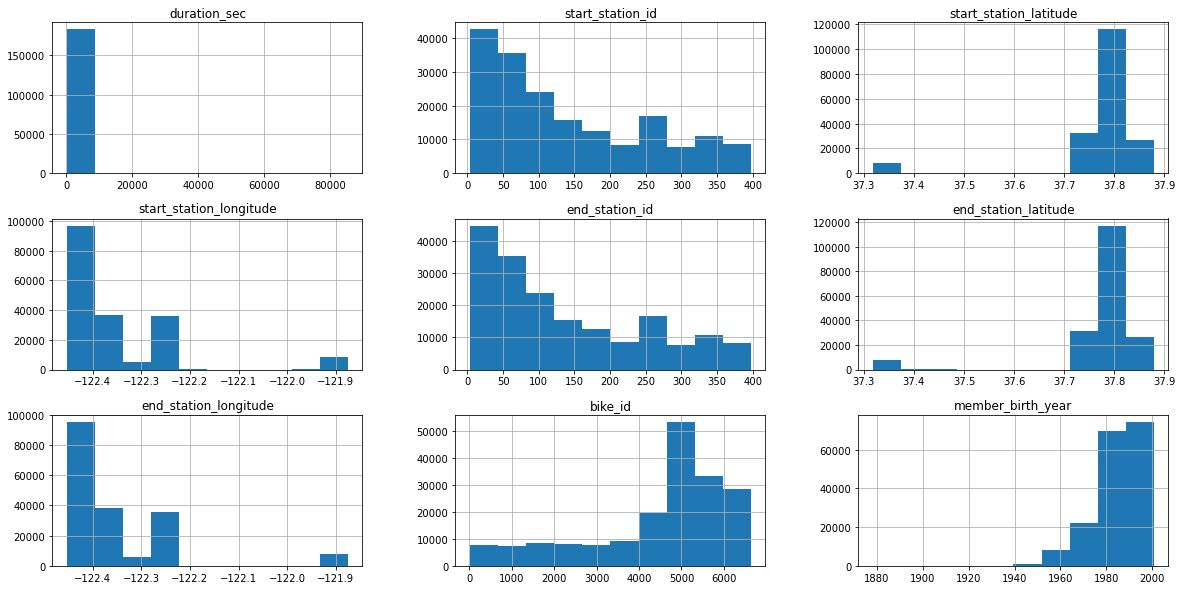

In [6]:
ford_bike.hist(figsize= (20,10));

### What is the structure of your dataset?

> 16 Columns and 183412 rows. ie (183412, 16)

### What is/are the main feature(s) of interest in your dataset?
> we are interested in mapping out the relationship/corelation between a trip duration and other variables in the dataset 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. long and lat of the start and end station to calculate the approx distance
> 2. Start and End station id to get the most visited stations  
> 3. Bike id to get the most used bike
> 4. Types of customers


# Data Wrangling 

In [7]:
# helper method for calculating the distance between two lang, lat points 
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude 
from math import sin, cos, sqrt, atan2, radians

def calculate_distance (start_lat, start_long, end_lat, end_long):

    """ 
    This functions returns the distance in KM between two points 
    
    Parameters
    ----------
    start_lat : float64
        The starting point latitude 
    start_long : float64
        The starting point longitude 
    end_lat : float64
        The ending point latitude 
    end_long : float64
        The ending point longitude

    Returns
    -------
    float64
        a float number representing the distance in KM 
    """
    R = 6373.0

    lat1 = np.radians(start_lat)
    lon1 = np.radians(start_long)
    lat2 = np.radians(end_lat)
    lon2 = np.radians(end_long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c

    return distance

In [8]:
ford_bike['distance'] = calculate_distance(ford_bike.start_station_latitude, ford_bike.start_station_longitude,  ford_bike.end_station_latitude, ford_bike.end_station_longitude)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [9]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
0%       1.785330
10%      2.330414
20%      2.462398
30%      2.556303
40%      2.637490
50%      2.710963
60%      2.783904
70%      2.859138
80%      2.946943
90%      3.071145
max      4.931682
Name: duration_sec, dtype: float64

In [10]:
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )
bins

array([5.43663072e+01, 6.10000000e+01, 6.84431257e+01, 7.67944501e+01,
       8.61647902e+01, 9.66784847e+01, 1.08475044e+02, 1.21711001e+02,
       1.36561989e+02, 1.53225072e+02, 1.71921359e+02, 1.92898937e+02,
       2.16436167e+02, 2.42845374e+02, 2.72476991e+02, 3.05724213e+02,
       3.43028208e+02, 3.84883980e+02, 4.31846928e+02, 4.84540223e+02,
       5.43663072e+02, 6.10000000e+02, 6.84431257e+02, 7.67944501e+02,
       8.61647902e+02, 9.66784847e+02, 1.08475044e+03, 1.21711001e+03,
       1.36561989e+03, 1.53225072e+03, 1.71921359e+03, 1.92898937e+03,
       2.16436167e+03, 2.42845374e+03, 2.72476991e+03, 3.05724213e+03,
       3.43028208e+03, 3.84883980e+03, 4.31846928e+03, 4.84540223e+03,
       5.43663072e+03, 6.10000000e+03, 6.84431257e+03, 7.67944501e+03,
       8.61647902e+03, 9.66784847e+03, 1.08475044e+04, 1.21711001e+04,
       1.36561989e+04, 1.53225072e+04, 1.71921359e+04, 1.92898937e+04,
       2.16436167e+04, 2.42845374e+04, 2.72476991e+04, 3.05724213e+04,
      

<Figure size 576x576 with 0 Axes>

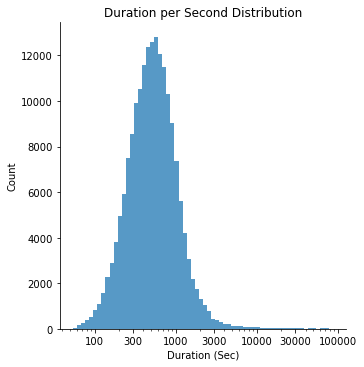

In [11]:
plt.figure(figsize=[8, 8]);
sb.displot(ford_bike.duration_sec, bins = bins )
plt.xscale('log')

ticks = [ 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Duration per Second Distribution');
plt.xlabel('Duration (Sec)');
plt.ylabel('Count');

> The logarithmic distribution of the duration per second looks normally distributed. The peak of the distribution of the duration occures at around 600-700 sec 

Text(0.5, 1.0, 'Percentage distribution of different Users Type')

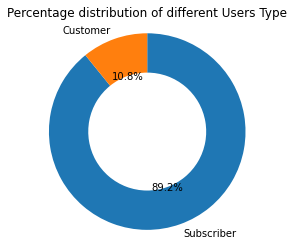

In [12]:
sorted_counts = ford_bike.user_type.value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},  autopct='%1.1f%%' );
plt.axis('square');

plt.title('Percentage distribution of different Users Type')


> This pie chart indicates that the number of subscribers are much larger than the number of customers 

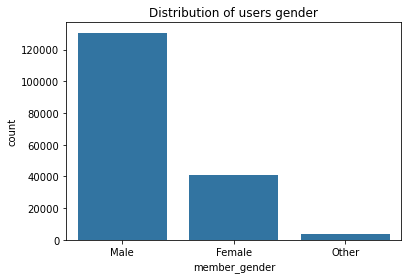

In [13]:
sorted_counts = ford_bike.member_gender.value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = ford_bike, x = 'member_gender', order = sorted_counts, color = base_color );
plt.title('Distribution of users gender');

> This count plot indicates that the majority of the bike users are Males 

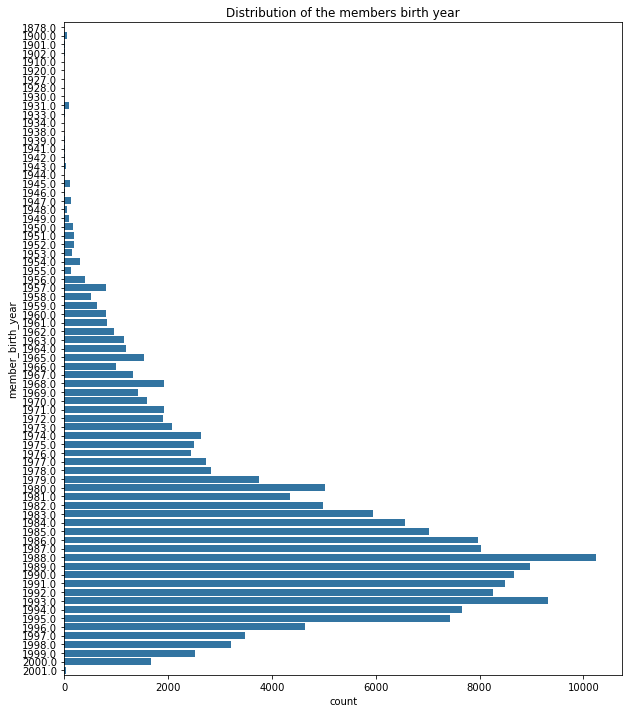

In [14]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,12));
sb.countplot(data= ford_bike, y = 'member_birth_year', color = base_color ); 
plt.title('Distribution of the members birth year');


> The above figure indicates that members that are born on 1988 are the most frequent ford bike users

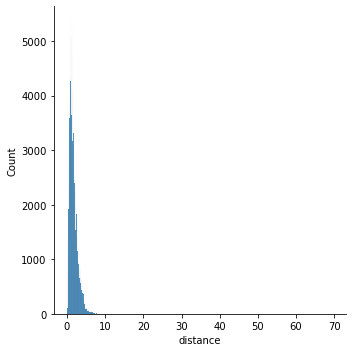

In [15]:
base_color = sb.color_palette()[0]
sb.displot(data = ford_bike,  x = 'distance', color=base_color); 

In [16]:
(ford_bike.distance.describe())

count    183412.000000
mean          1.691190
std           1.097934
min           0.000000
25%           0.911241
50%           1.431187
75%           2.226386
max          69.491049
Name: distance, dtype: float64

In [17]:
ford_bike [ford_bike.start_station_id == ford_bike.end_station_id]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
19,874,2019-02-28 23:43:05.1830,2019-02-28 23:57:39.7960,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,5629,Customer,1978.0,Male,No,0.0
27,408,2019-02-28 23:48:08.2820,2019-02-28 23:54:56.9300,78.0,Folsom St at 9th St,37.773717,-122.411647,78.0,Folsom St at 9th St,37.773717,-122.411647,5410,Subscriber,1982.0,Male,No,0.0
34,471,2019-02-28 23:42:43.3610,2019-02-28 23:50:34.4460,133.0,Valencia St at 22nd St,37.755213,-122.420975,133.0,Valencia St at 22nd St,37.755213,-122.420975,5559,Subscriber,1992.0,Male,No,0.0
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No,0.0
55,3478,2019-02-28 22:39:35.0200,2019-02-28 23:37:33.3420,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,1846,Subscriber,1995.0,Male,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183317,1476,2019-02-01 02:45:04.7440,2019-02-01 03:09:41.1840,345.0,Hubbell St at 16th St,37.766483,-122.398279,345.0,Hubbell St at 16th St,37.766483,-122.398279,5224,Subscriber,1967.0,Male,No,0.0
183318,877,2019-02-01 02:53:15.9950,2019-02-01 03:07:53.0580,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,4913,Subscriber,1987.0,Male,No,0.0
183326,5713,2019-02-01 01:02:55.1680,2019-02-01 02:38:09.0020,31.0,Raymond Kimbell Playground,37.783813,-122.434559,31.0,Raymond Kimbell Playground,37.783813,-122.434559,5366,Subscriber,1972.0,Male,No,0.0
183350,874,2019-02-01 01:41:43.4140,2019-02-01 01:56:17.5520,253.0,Haste St at College Ave,37.866418,-122.253799,253.0,Haste St at College Ave,37.866418,-122.253799,3232,Subscriber,1995.0,Male,Yes,0.0


> distance might not be useful for our analysis. We can see that there might be the case of doing a round trip where a bike starts at point A and arrives at point A. So the total distance will have been calculated to be 0, however we can see a non-zero duration indicating round trips. so, it would be hard to find a corelation between distance and duration per second

Text(0.5, 1.0, 'Percentage distribution of bike sharing')

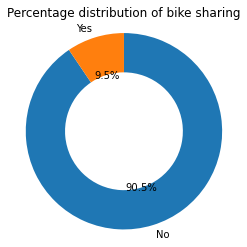

In [18]:
sorted_counts = ford_bike.bike_share_for_all_trip.value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},  autopct='%1.1f%%' );
plt.axis('square');

plt.title('Percentage distribution of bike sharing')

> The figure above, shows that 90.5 % of the trips, users do not share their bikes through the trips

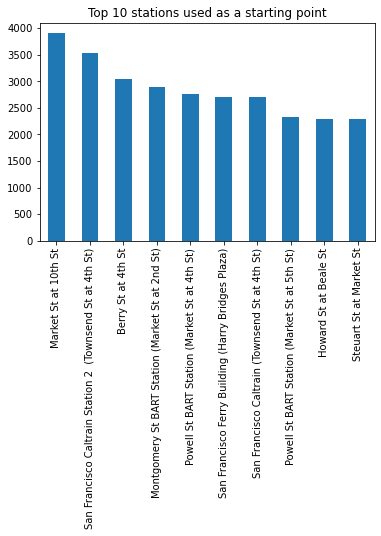

In [19]:
sorted_counts = ford_bike.start_station_name.value_counts()

top_10_start_stations = sorted_counts[:10]

top_10_start_stations.plot(kind = 'bar')

plt.title ('Top 10 stations used as a starting point');

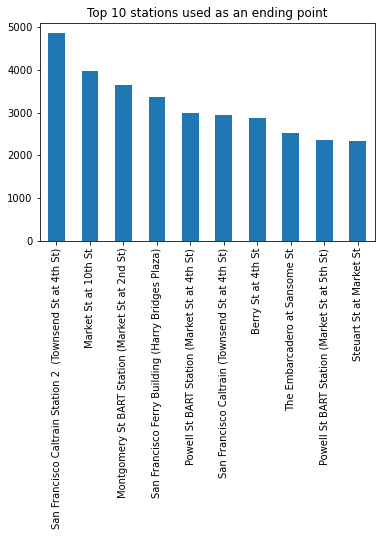

In [20]:
sorted_counts = ford_bike.end_station_name.value_counts()

top_10_start_stations = sorted_counts[:10]

top_10_start_stations.plot(kind = 'bar')

plt.title ('Top 10 stations used as an ending point');

> we can see a lot of similarities in the top starting and ending points of the trip, we can consider the intersection of the two charts as the most popular sights visited by ford bikers

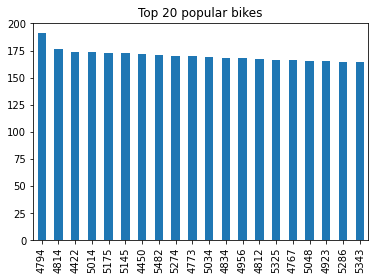

In [21]:
sorted_counts = ford_bike.bike_id.value_counts()

top_20_start_stations = sorted_counts[:20]

top_20_start_stations.plot(kind = 'bar')

plt.title ('Top 20 popular bikes');

> The figure above shows that the most frequent bike used for trips is the one with id = 4794

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Logarithmic distribution of the `duration_sec`  looks normal. The peak of the durations distribution is at around 600 seconds. Some transformations needed to be done such as scaling the x-axis logarithmically and update the bin ticks to be able to clearly interpret the durations distribution   

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I tried to add an additional attribute to the dataset named `distance` which represents the distance from the starting to the ending point in the trip. this additional feature showed that around 3000 trips were made from a starting point and ended at the same point. I believe, we can take a step further in the bivariate exploration by filtering out the zero-distanced and investigate the corelation between duration and distance. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [22]:
filtered_go_bike = ford_bike[ ford_bike.distance > 0]

filtered_go_bike.distance.describe()


count    179532.000000
mean          1.727739
std           1.080908
min           0.013291
25%           0.941349
50%           1.461044
75%           2.254264
max          69.491049
Name: distance, dtype: float64

In [23]:
np.percentile(filtered_go_bike.distance, 99)

5.093661094016061

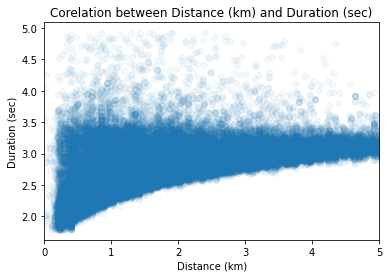

In [24]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

    
sb.regplot(x = filtered_go_bike.distance, y = filtered_go_bike.duration_sec.apply(log_trans) , fit_reg = False,  scatter_kws={'alpha':1/20} );
plt.xlabel('Distance (km)');
plt.ylabel('Duration (sec)');
plt.xlim(0, 5);

plt.title('Corelation between Distance (km) and Duration (sec)');


> Plotting the Duration (second) against Distance (km) indicates a strong positive corelation between both variables as one can expect  

<Figure size 576x576 with 0 Axes>

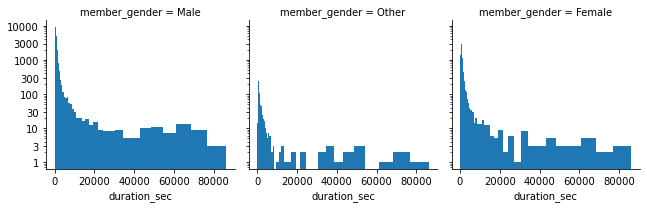

In [25]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


plt.figure(figsize=(8,8));

g = sb.FacetGrid(data = ford_bike, col = 'member_gender');
g.map(plt.hist, 'duration_sec', bins = bins);
plt.yscale('log')

ticks = [ 1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

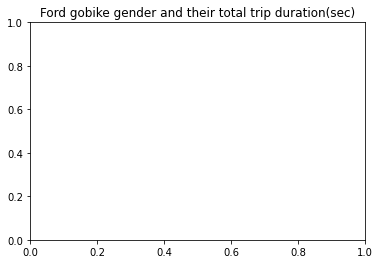

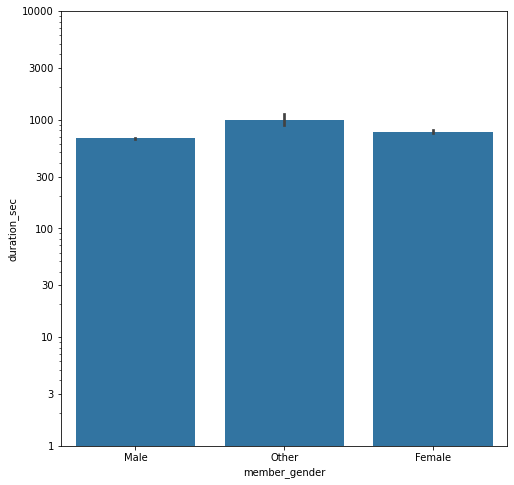

In [26]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )

plt.title('Ford gobike gender and their total trip duration(sec)')

plt.figure(figsize=(8,8));

base_color = sb.color_palette()[0]
sb.barplot(data = ford_bike, x='member_gender', y='duration_sec', color=base_color)

plt.yscale('log')

ticks = [ 1, 3, 10, 30, 100, 300 , 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

> Recall from the univariant distribution that Male represents the highest number of the distribution from the dataset followed by Female then Others , the above figure shows a very interesting observation. Although the other gender has the smallest population in the dataset, they tend to have the largest trip duration followed by Female bikers and finally Male bikers

<Figure size 576x576 with 0 Axes>

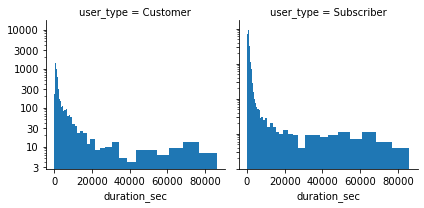

In [27]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


plt.figure(figsize=(8,8));

g = sb.FacetGrid(data = ford_bike, col = 'user_type');
g.map(plt.hist, 'duration_sec', bins = bins);
plt.yscale('log')

ticks = [ 1, 3, 10, 30, 100, 300 , 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

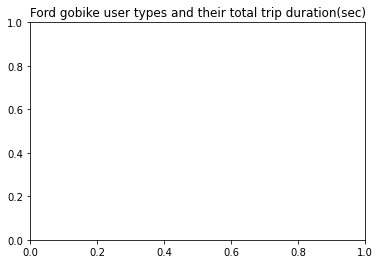

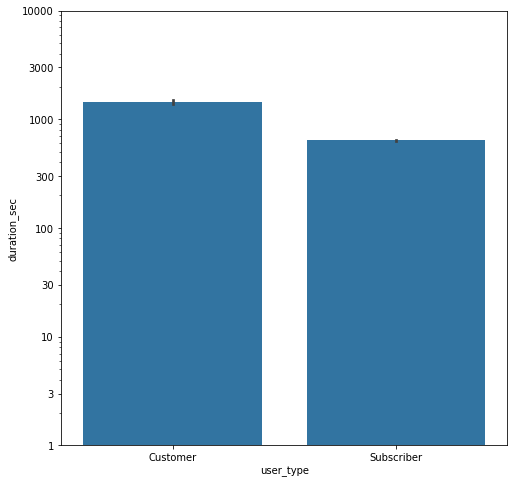

In [28]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )

plt.title('Ford gobike user types and their total trip duration(sec)')

plt.figure(figsize=(8,8));

base_color = sb.color_palette()[0]
sb.barplot(data = ford_bike, x='user_type', y='duration_sec', color=base_color)

plt.yscale('log')

ticks = [ 1, 3, 10, 30, 100, 300 , 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

> Recall from the univariant distribution that Customers represent 10.8 % from our dataset, the above figure shows that with that small percentage their trips tend to take longer time 

> 

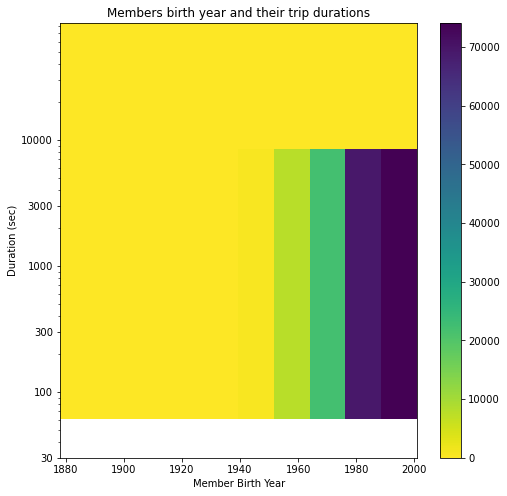

In [29]:

percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


plt.figure(figsize=(8,8));

plt.hist2d(data = ford_bike.dropna(), x = 'member_birth_year', y = 'duration_sec', cmap = 'viridis_r')
plt.yscale('log')
plt.colorbar()

ticks = [ 30, 100, 300 , 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

plt.xlabel('Member Birth Year')
plt.ylabel('Duration (sec)')

plt.title('Members birth year and their trip durations');

> The figure above indicates that people that are born from 1990 and above do most trips on the go ford bike 

In [30]:
top_50_ford_bikes = (ford_bike.bike_id.value_counts()[:50]) 
order_index = top_50_ford_bikes.index

top_50_ford_bikes = pd.DataFrame({'bike_id': top_50_ford_bikes.index , 'count': top_50_ford_bikes})

top_50_ford_bikes = ford_bike[ ford_bike.bike_id.isin(top_50_ford_bikes.bike_id)]

top_50_ford_bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
17,674,2019-02-28 23:48:25.0950,2019-02-28 23:59:40.0920,74.0,Laguna St at Hayes St,37.776435,-122.426244,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,5343,Subscriber,1975.0,Male,No,2.211886
54,401,2019-02-28 23:30:52.4710,2019-02-28 23:37:33.9550,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990.0,Female,No,0.971731
86,175,2019-02-28 23:15:09.9130,2019-02-28 23:18:05.7640,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,132.0,24th St at Chattanooga St,37.751819,-122.426614,5048,Subscriber,1981.0,Male,No,0.463252
166,676,2019-02-28 22:33:19.2420,2019-02-28 22:44:35.3550,86.0,Market St at Dolores St,37.769305,-122.426826,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,4773,Subscriber,1984.0,Female,No,2.420825
171,522,2019-02-28 22:33:25.6070,2019-02-28 22:42:08.2090,125.0,20th St at Bryant St,37.759200,-122.409851,60.0,8th St at Ringold St,37.774520,-122.409449,4812,Subscriber,1989.0,Male,No,1.704396


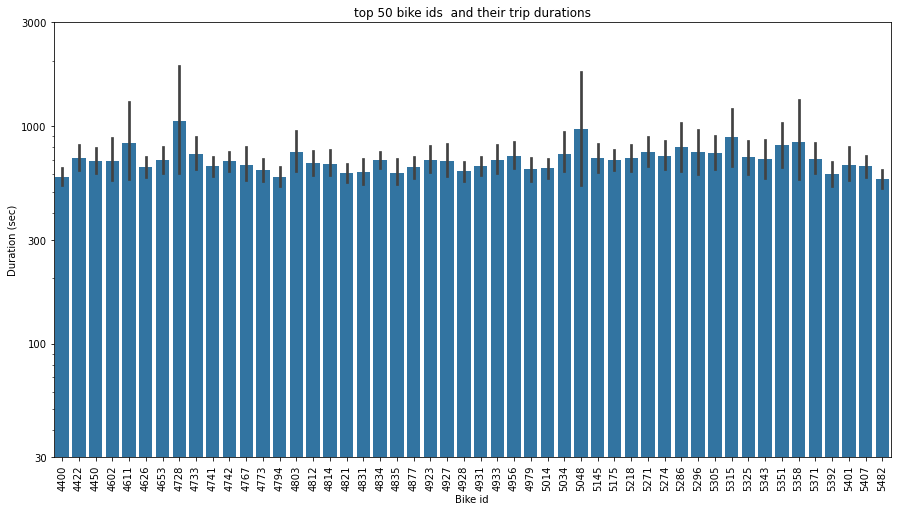

In [31]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(top_50_ford_bikes.duration_sec.describe(percentage)) 
np.log10(top_50_ford_bikes.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


plt.figure(figsize=(15 ,8));

sb.barplot(data = top_50_ford_bikes, x = 'bike_id', y = 'duration_sec', color = sb.color_palette()[0] )
plt.xticks(rotation = 90);
plt.yscale('log')

ticks = [ 30, 100, 300 , 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

plt.xlabel('Bike id')
plt.ylabel('Duration (sec)')

plt.title('top 50 bike ids  and their trip durations');

> The Figure above shows that bike with id = 4728 has been used by users for the longest duration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> By ploting the distance against the duration per second, we expected that they would have a strong positive corelation and that is actually what we observed in the first figure of the bivariate exploration

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> While ploting duration against the gender, we see a similarity in both graphs that Males and Females prefer to do short trips than long bike trips.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [32]:
top_50_ford_bikes = (ford_bike.bike_id.value_counts()[:50]) 
order_index = top_50_ford_bikes.index

top_50_ford_bikes = pd.DataFrame({'bike_id': top_50_ford_bikes.index , 'count': top_50_ford_bikes})

top_50_ford_bikes = ford_bike[ ford_bike.bike_id.isin(top_50_ford_bikes.bike_id)]

top_50_ford_bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
17,674,2019-02-28 23:48:25.0950,2019-02-28 23:59:40.0920,74.0,Laguna St at Hayes St,37.776435,-122.426244,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,5343,Subscriber,1975.0,Male,No,2.211886
54,401,2019-02-28 23:30:52.4710,2019-02-28 23:37:33.9550,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990.0,Female,No,0.971731
86,175,2019-02-28 23:15:09.9130,2019-02-28 23:18:05.7640,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,132.0,24th St at Chattanooga St,37.751819,-122.426614,5048,Subscriber,1981.0,Male,No,0.463252
166,676,2019-02-28 22:33:19.2420,2019-02-28 22:44:35.3550,86.0,Market St at Dolores St,37.769305,-122.426826,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,4773,Subscriber,1984.0,Female,No,2.420825
171,522,2019-02-28 22:33:25.6070,2019-02-28 22:42:08.2090,125.0,20th St at Bryant St,37.759200,-122.409851,60.0,8th St at Ringold St,37.774520,-122.409449,4812,Subscriber,1989.0,Male,No,1.704396


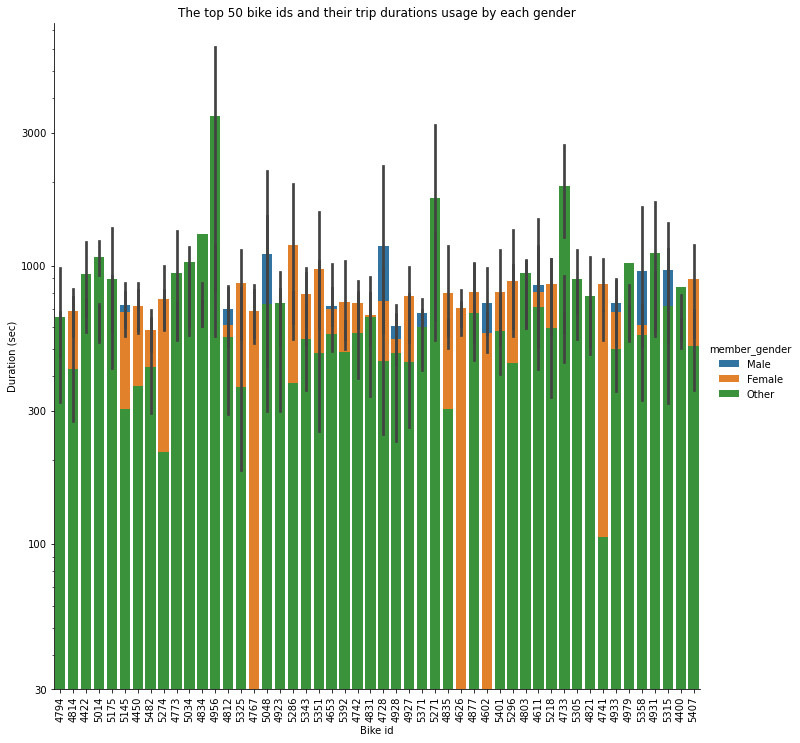

In [33]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(top_50_ford_bikes.duration_sec.describe(percentage)) 
np.log10(top_50_ford_bikes.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


g = sb.FacetGrid(data = top_50_ford_bikes, hue = 'member_gender', height = (10) );
g.map(sb.barplot, 'bike_id', 'duration_sec', order = order_index );
plt.xticks(rotation = 90);
plt.yscale('log')

ticks = [ 30, 100, 300 , 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

plt.xlabel('Bike id')
plt.ylabel('Duration (sec)')

g.add_legend() 
plt.title('The top 50 bike ids and their trip durations usage by each gender');

> we can observe in the above figure that there are two bikes that are exclusively prefered by Females which are 4767 and 4262

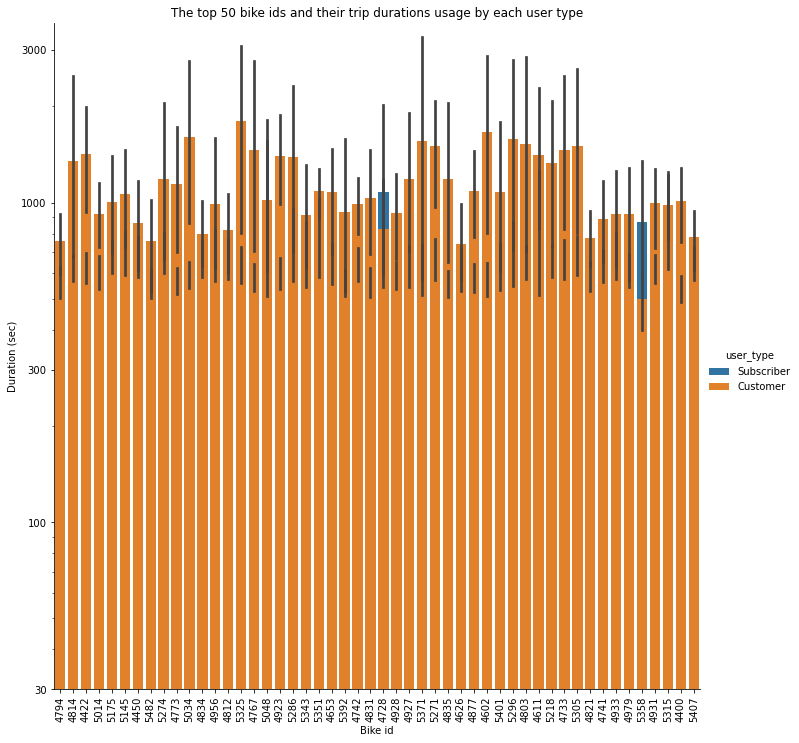

In [34]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(top_50_ford_bikes.duration_sec.describe(percentage)) 
np.log10(top_50_ford_bikes.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


g = sb.FacetGrid(data = top_50_ford_bikes, hue = 'user_type', height = (10) );
g.map(sb.barplot, 'bike_id', 'duration_sec', order = order_index );
plt.xticks(rotation = 90);
plt.yscale('log')

ticks = [ 30, 100, 300 , 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

plt.xlabel('Bike id')
plt.ylabel('Duration (sec)')

g.add_legend() 
plt.title('The top 50 bike ids and their trip durations usage by each user type');

> The Figure above shows that the top 50 bikes that has the highest durations are influenced by the Customer and not the Subscriber

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the Multivariant explorations, we explored and filtered the dataset to contain only the top 50 bikes used by the users. We used these information and plotted againest the duration and some other dependent variables such as member gender and user types. 

### Were there any interesting or surprising interactions between features?

> The observations we noticed in the last two figures represents very critical insights. We notice that the decision made to pick the most popular 50 bikes are influenced by the gender `other` and user_type `customer`. Both of these attributes represents the minor population in our dataset. So any business decisions boost the sales/manufacture of these bikes will likely be incorrect, since the majority of our dataset are `male` and `subscriber` users.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!